#    Importing library

In [106]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
%matplotlib inline
import plotly.graph_objs as go
import ipywidgets as widgets
import plotly.express as px


# sns.set_style('darkgrid')
# sns.set_style('whitegrid')
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (14, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Data importing


In [108]:
deliveries=pd.read_csv('C:\\Users\\Anuj\\OneDrive\\Desktop\\WIDS\\IPL_Ball_by_Ball_2008_2022.csv')

In [109]:
matches=pd.read_csv('C:\\Users\\Anuj\\OneDrive\\Desktop\\WIDS\\IPL_Matches_2008_2022.csv')

# Basic information form data

In [110]:
deliveries.describe()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
count,2.259540e+05,225954.000000,225954.000000,225954.000000,225954.000000,225954.000000,225954.00000,225954.000000,225954.000000
mean,8.320470e+05,1.483868,9.185679,3.619750,1.243523,0.066907,1.31043,0.000093,0.049351
std,3.379542e+05,0.503104,5.681797,1.810633,1.618166,0.341470,1.60605,0.009640,0.216600
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.012620e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,8.297370e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.00000,0.000000,0.000000
75%,1.178395e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.00000,0.000000,0.000000
max,1.312200e+06,6.000000,19.000000,10.000000,6.000000,7.000000,7.00000,1.000000,1.000000


In [111]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [112]:
deliveries.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [113]:
matches.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [114]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [115]:
matches.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [116]:
matches.head(1200)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


# Data preprocessing

In [ ]:
# Changing the 'Venue' to 'venue'

In [117]:
matches.rename(columns={'Venue':'venue'},inplace=True)


In [ ]:
# Filling the values of city based on venue

In [118]:
conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]

In [119]:
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']

In [120]:
matches['City'] = np.where(matches['City'].isnull(),
                           np.select(conditions, values),
                           matches['City'])

In [ ]:
# Remove NA values in winningteam

In [121]:
matches=matches[matches["WinningTeam"].notna()]

In [ ]:
# Checking the unique name of team

In [122]:
matches['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [ ]:
#Replace two names for the same team with a single name

In [123]:
matches['Team1'] = matches['Team1'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
matches['Team2'] = matches['Team2'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
matches['TossWinner'] = matches['TossWinner'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")
matches['WinningTeam'] = matches['WinningTeam'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")

In [ ]:
# dropping the coloumn method

In [124]:
matches = matches.drop(columns=['method'], axis=1)

In [146]:
# copy data of matches to matches2

In [125]:
matches2 = matches.copy()

In [147]:
#Replace string columns to numeric values

In [126]:
pd.options.mode.chained_assignment = None  # To remove warning
enc = LabelEncoder()

matches["City"] = enc.fit_transform(matches["City"])
matches["Team1"] = enc.fit_transform(matches["Team1"])
matches["Team2"] = enc.fit_transform(matches["Team2"])
matches["TossWinner"] = enc.fit_transform(matches["TossWinner"])
matches["TossDecision"] = enc.fit_transform(matches["TossDecision"])
matches["WinningTeam"] = enc.fit_transform(matches["WinningTeam"])
matches["venue"] = enc.fit_transform(matches["venue"])
matches["TossDecision"]=enc.fit_transform(matches["TossDecision"])
matches["WonBy"]=enc.fit_transform(matches["WonBy"])
matches["City"]=enc.fit_transform(matches["City"])
matches["Season"]=enc.fit_transform(matches["Season"])
matches["Player_of_Match"]=enc.fit_transform(matches["Player_of_Match"])
matches["Team1Players"]=enc.fit_transform(matches["Team1Players"])
matches["Team2Players"]=enc.fit_transform(matches["Team2Players"])
matches["Umpire1"]=enc.fit_transform(matches["Umpire1"])
matches["Umpire2"]=enc.fit_transform(matches["Umpire2"])
matches["MatchNumber"]=enc.fit_transform(matches["MatchNumber"])


In [127]:
matches.isnull().sum()

ID                  0
City                0
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin             14
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
dtype: int64

In [128]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,1,2022-05-29,14,75,13,5,26,13,0,N,5,2,7.0,73,921,923,13,35
1,1312199,1,2022-05-27,14,78,15,13,26,13,1,N,13,2,7.0,88,889,930,13,35
2,1312198,22,2022-05-25,14,74,15,9,12,9,1,N,15,0,14.0,197,888,631,23,29
3,1312197,22,2022-05-24,14,77,13,5,12,5,1,N,5,2,7.0,47,922,922,10,58
4,1304116,23,2022-05-22,14,68,16,12,47,16,0,N,12,2,5.0,78,583,375,2,32


# EDA

In [ ]:
# Replacing the '2007/08' to '2008'

In [129]:
matches['Season']=matches['Season'].replace('2007/08','2008')

In [ ]:
# Showing the max win per year for team

In [130]:
wins_per_season = matches.groupby('Season')['WinningTeam'].value_counts()
wins_per_season_df = pd.DataFrame(columns = ['year', 'team', 'wins'])
year = 0

In [131]:
for item in wins_per_season.iteritems():
     if (item[0][0] == year):
        win_series = pd.DataFrame({  
        'year' : [item[0][0]],
        'team' : [item[0][1]],
        'wins' : [item[1]]
    })
        wins_per_season_df = wins_per_season_df.append(win_series)
        year += 1

C:\Users\Anuj\AppData\Local\Temp\ipykernel_20372\27477476.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wins_per_season_df = wins_per_season_df.append(win_series)
C:\Users\Anuj\AppData\Local\Temp\ipykernel_20372\27477476.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wins_per_season_df = wins_per_season_df.append(win_series)
C:\Users\Anuj\AppData\Local\Temp\ipykernel_20372\27477476.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wins_per_season_df = wins_per_season_df.append(win_series)
C:\Users\Anuj\AppData\Local\Temp\ipykernel_20372\27477476.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wins_per_season_df = wins_p

In [132]:
 wins_per_season_df

,year,team,wins
0,0,13,13
0,1,3,10
0,2,10,11
0,3,0,11
0,4,8,12
0,5,10,13
0,6,6,12
0,7,0,10
0,8,16,11
0,9,10,12


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wins', ylabel='team'>

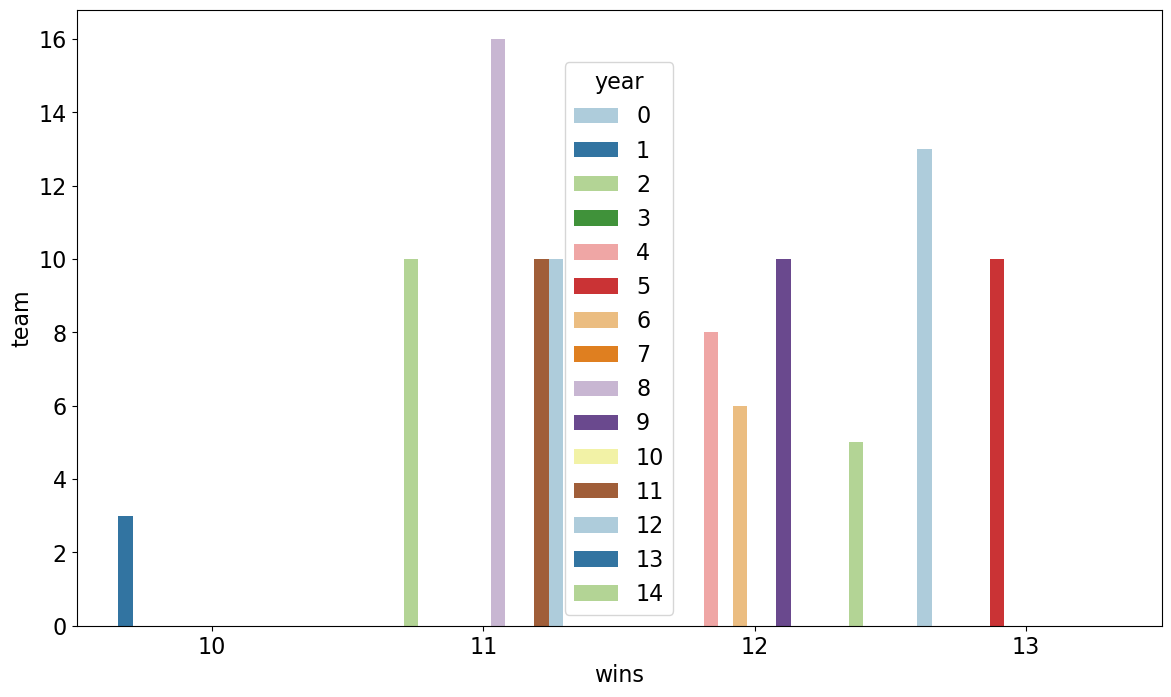

In [133]:
sns.barplot('wins', 'team', hue='year', data=wins_per_season_df, palette='Paired') 

In [134]:
for col in matches:
    print(matches[col].unique())

[1312200 1312199 1312198 1312197 1304116 1304115 1304114 1304113 1304112
 1304111 1304110 1304109 1304108 1304107 1304106 1304105 1304104 1304103
 1304102 1304101 1304100 1304099 1304098 1304097 1304096 1304095 1304094
 1304093 1304092 1304091 1304090 1304089 1304088 1304087 1304086 1304085
 1304084 1304083 1304082 1304081 1304080 1304079 1304078 1304077 1304076
 1304075 1304074 1304073 1304072 1304071 1304070 1304069 1304068 1304067
 1304066 1304065 1304064 1304063 1304062 1304061 1304060 1304059 1304058
 1304057 1304056 1304055 1304054 1304053 1304052 1304051 1304050 1304049
 1304048 1304047 1254117 1254116 1254115 1254114 1254101 1254088 1254106
 1254094 1254095 1254093 1254110 1254090 1254109 1254112 1254089 1254102
 1254091 1254103 1254099 1254092 1254100 1254098 1254108 1254097 1254107
 1254113 1254096 1254105 1254111 1254087 1254104 1254086 1254085 1254084
 1254083 1254082 1254081 1254080 1254079 1254078 1254077 1254076 1254075
 1254074 1254073 1254072 1254071 1254070 1254069 12

In [135]:
venue_ser = matches2['venue'].value_counts()

In [136]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

C:\Users\Anuj\AppData\Local\Temp\ipykernel_20372\63572973.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  venue_df = venue_df.append(temp_df, ignore_index=True)


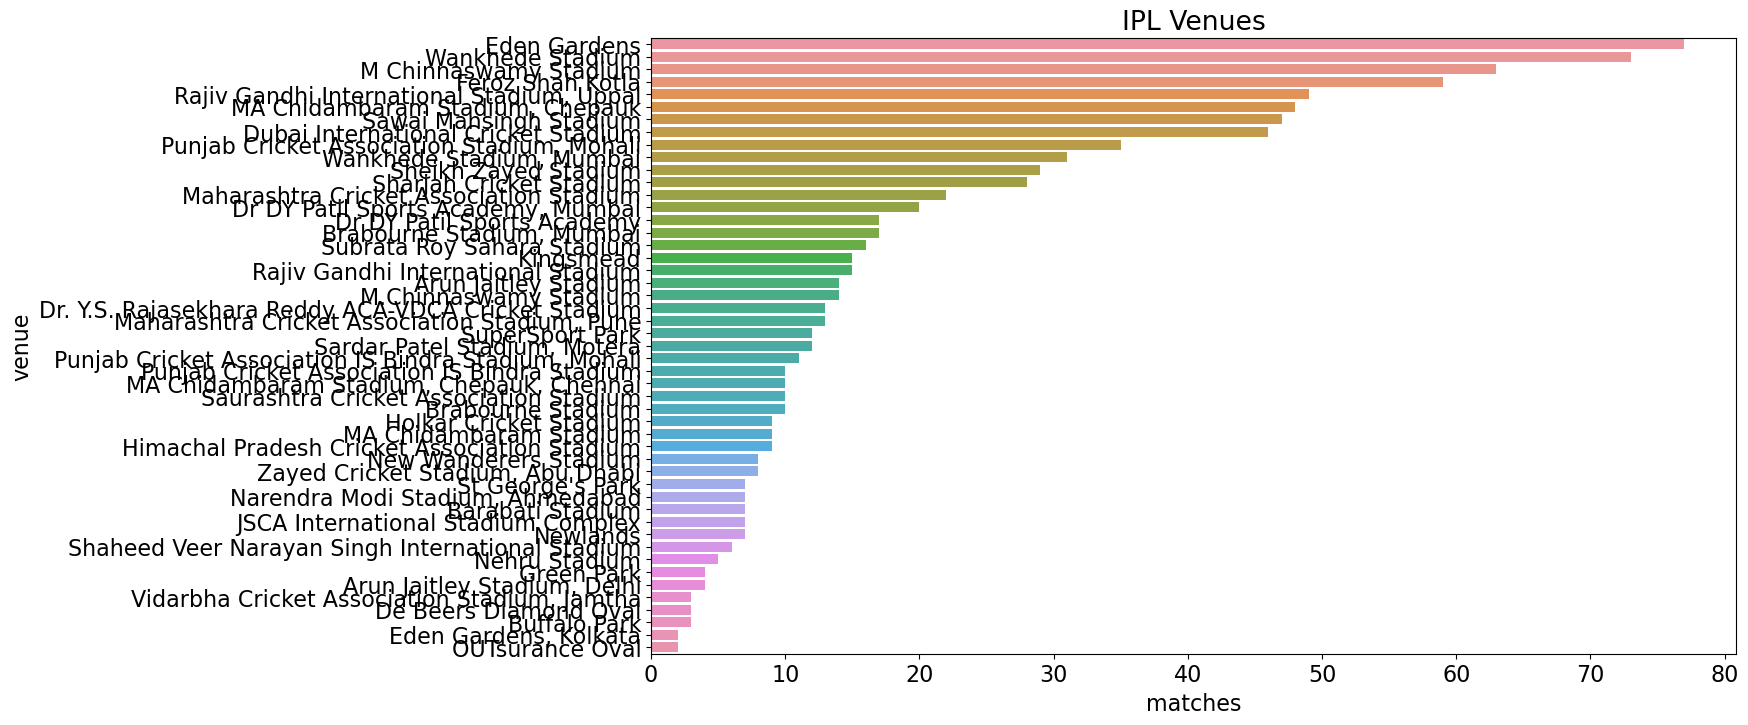

In [138]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

In [139]:
venue_df

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,63
3,Feroz Shah Kotla,59
4,"Rajiv Gandhi International Stadium, Uppal",49
5,"MA Chidambaram Stadium, Chepauk",48
6,Sawai Mansingh Stadium,47
7,Dubai International Cricket Stadium,46
8,"Punjab Cricket Association Stadium, Mohali",35
9,"Wankhede Stadium, Mumbai",31


In [140]:
team_wins_ser = matches2['WinningTeam'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

C:\Users\Anuj\AppData\Local\Temp\ipykernel_20372\3309896240.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)


In [141]:
 team_wins_df

,team,wins
0,Mumbai Indians,131
1,Chennai Super Kings,121
2,Kolkata Knight Riders,114
3,Royal Challengers Bangalore,109
4,Rajasthan Royals,96
5,Kings XI Punjab,88
6,Sunrisers Hyderabad,75
7,Delhi Daredevils,67
8,Delhi Capitals,36
9,Deccan Chargers,29


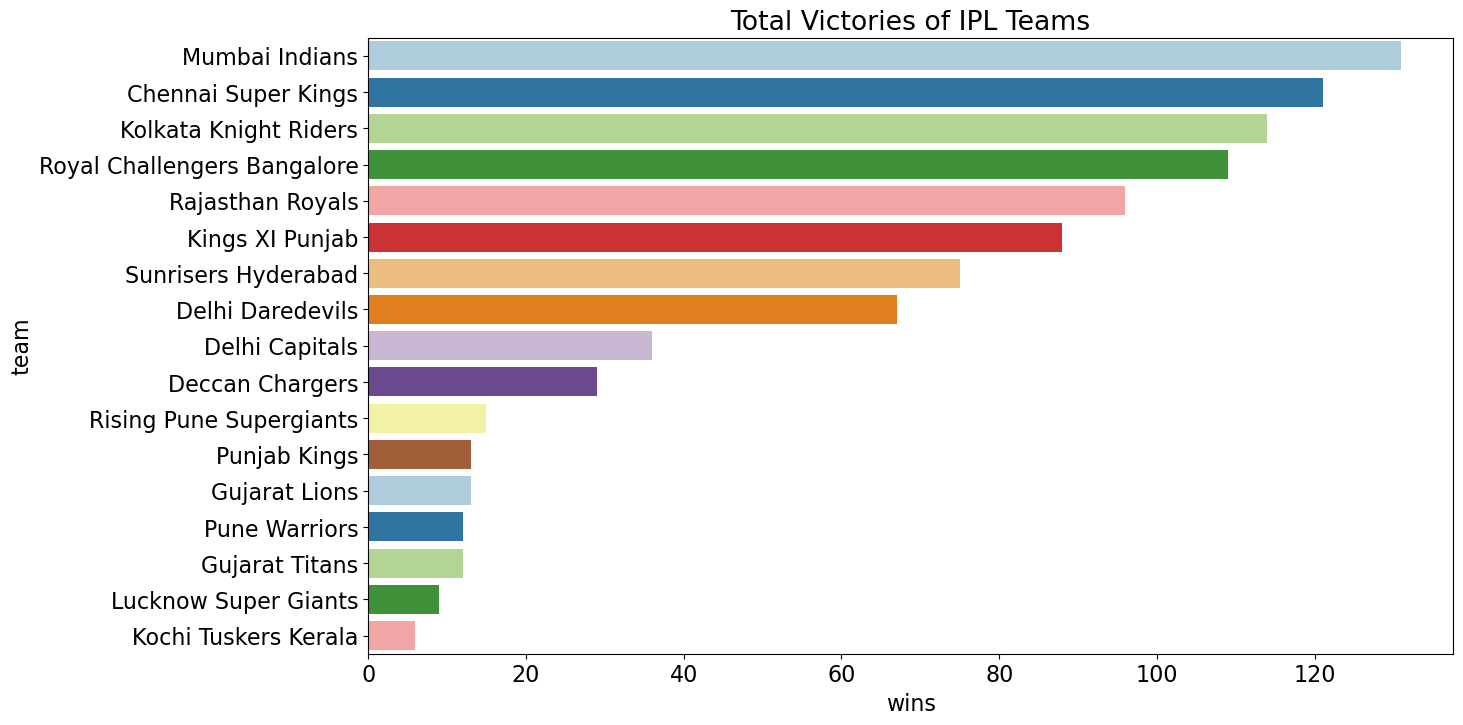

In [142]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

In [143]:
Most_man_of_match = matches['Player_of_Match'].value_counts()
potm_award_df = pd.DataFrame(columns = ['player', 'awards'])
i=0
for item in Most_man_of_match.iteritems():
  if i>=15:
    break
  else:
    temp_potm = pd.DataFrame({
        'player' : [item[0]],
        'awards' : [item[1]]
    })
    potm_award_df = potm_award_df.append(temp_potm, ignore_index=True)
    i += 1

C:\Users\Anuj\AppData\Local\Temp\ipykernel_20372\4275013779.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  potm_award_df = potm_award_df.append(temp_potm, ignore_index=True)


In [144]:
 potm_award_df

,player,awards
0,10,25
1,38,22
2,48,18
3,194,18
4,153,17
5,258,16
6,231,16
7,102,14
8,218,14
9,250,14


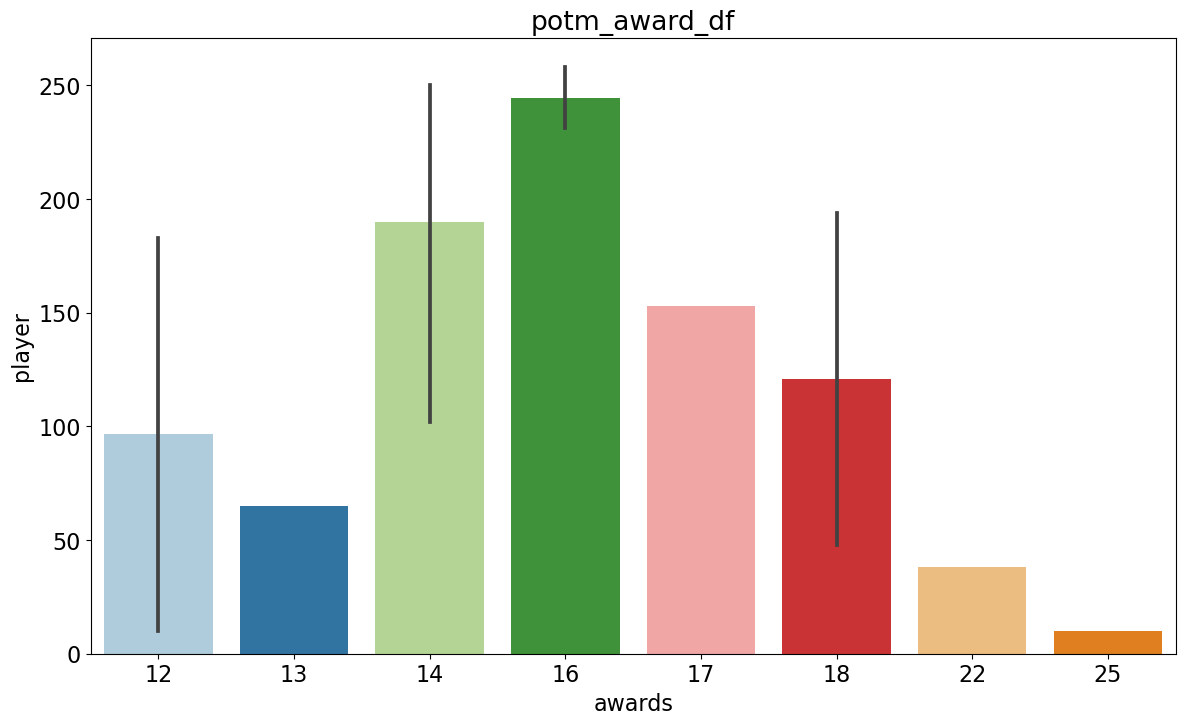

In [145]:
plt.title("potm_award_df")
sns.barplot(x='awards', y='player', data=potm_award_df, palette='Paired');

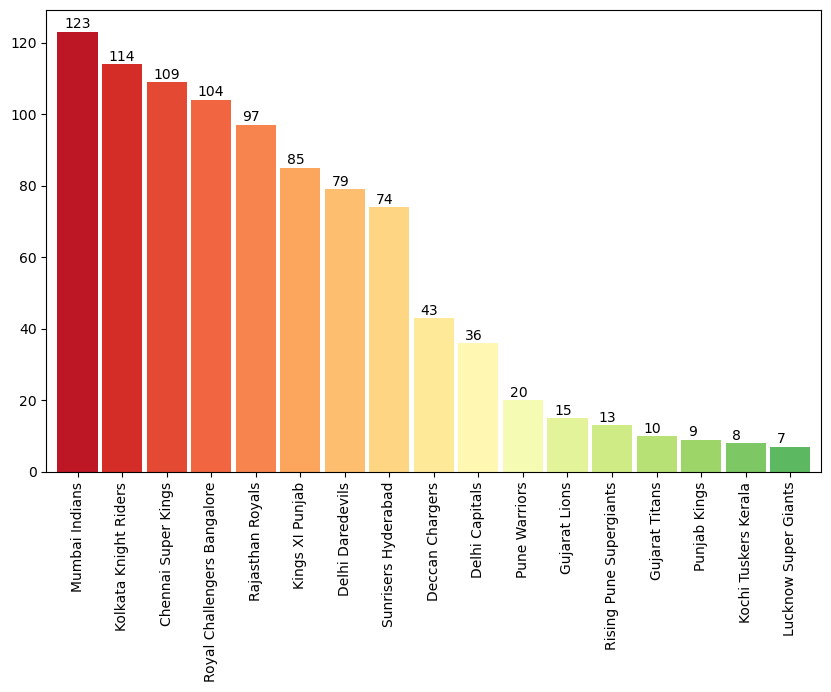

In [40]:
plt.subplots(figsize=(10,6))
ax=matches2['TossWinner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

# Classification


In [41]:
x = matches.iloc[:,[2,4,5,6,7,14]]
y = matches.iloc[:,10]

In [42]:
#outcome variable team1_win as a probability of team1 winning the match
matches.loc[matches["WinningTeam"]==matches["Team1"],"team1_win"]=1
matches.loc[matches["WinningTeam"]!=matches["Team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
matches.loc[matches["TossWinner"]==matches["Team1"],"team1_toss_win"]=1
matches.loc[matches["TossWinner"]!=matches["Team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["TossDecision"]=="bat"),"team1_bat"]=1

In [43]:
#dataframe of related features
prediction_df=matches[["Team1","Team2","team1_toss_win","team1_bat","team1_win","venue"]]

#finding the higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
prediction_df.drop(columns=correlated_features)

,Team1,Team2,team1_toss_win,team1_bat,team1_win,venue
0,13,5,1.0,0,0.0,26
1,15,13,0.0,0,0.0,26
2,15,9,0.0,0,1.0,12
3,13,5,0.0,0,0.0,12
4,16,12,1.0,0,0.0,47
...,...,...,...,...,...,...
945,8,1,0.0,0,1.0,11
946,10,15,1.0,0,0.0,46
947,3,13,0.0,0,1.0,13
948,6,0,0.0,0,0.0,33


In [44]:
matches2.head(50)

,ID,City,Date,Season,MatchNumber,Team1,Team2,venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
5,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma
6,1304114,Mumbai,2022-05-20,2022,68,Chennai Super Kings,Rajasthan Royals,"Brabourne Stadium, Mumbai",Chennai Super Kings,bat,N,Rajasthan Royals,Wickets,5.0,R Ashwin,"['RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagad...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,NA Patwardhan
7,1304113,Mumbai,2022-05-19,2022,67,Gujarat Titans,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",Gujarat Titans,bat,N,Royal Challengers Bangalore,Wickets,8.0,V Kohli,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['V Kohli', 'F du Plessis', 'GJ Maxwell', 'KD ...",KN Ananthapadmanabhan,GR Sadashiv Iyer
8,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,N,Lucknow Super Giants,Runs,2.0,Q de Kock,"['Q de Kock', 'KL Rahul', 'E Lewis', 'DJ Hooda...","['VR Iyer', 'A Tomar', 'N Rana', 'SS Iyer', 'S...",R Pandit,YC Barde
9,1304111,Mumbai,2022-05-17,2022,65,Sunrisers Hyderabad,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Sunrisers Hyderabad,Runs,3.0,RA Tripathi,"['Abhishek Sharma', 'PK Garg', 'RA Tripathi', ...","['RG Sharma', 'Ishan Kishan', 'DR Sams', 'Tila...",CB Gaffaney,N Pandit


In [45]:
matches.drop('team1_bat', axis=1, inplace=True)

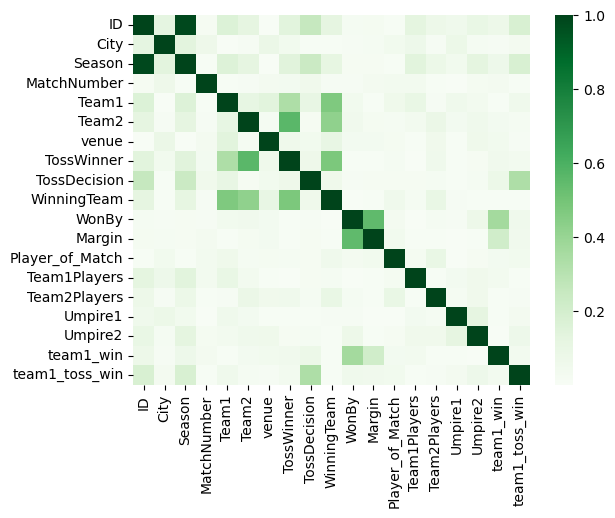

In [46]:
sns.heatmap(abs(matches.corr()), cmap='Greens')
plt.show()

In [47]:
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))


[[43 62]
 [30 55]]
              precision    recall  f1-score   support

           0       0.59      0.41      0.48       105
           1       0.47      0.65      0.54        85

    accuracy                           0.52       190
   macro avg       0.53      0.53      0.51       190
weighted avg       0.54      0.52      0.51       190

Accuracy of SVM classifier on test set: 0.5158


In [50]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

[[54 51]
 [48 37]]
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       105
           1       0.42      0.44      0.43        85

    accuracy                           0.48       190
   macro avg       0.47      0.47      0.47       190
weighted avg       0.48      0.48      0.48       190

Accuracy of decision tree classifier on test set: 0.4789


In [51]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))


[[34 71]
 [28 57]]
              precision    recall  f1-score   support

           0       0.55      0.32      0.41       105
           1       0.45      0.67      0.54        85

    accuracy                           0.48       190
   macro avg       0.50      0.50      0.47       190
weighted avg       0.50      0.48      0.46       190

Accuracy of logistic regression classifier on test set: 0.4789


# Regression

In [52]:
reg = pd.merge(deliveries, matches2, left_on='ID', right_on='ID', how='right')
reg = reg[reg['Season'].notnull()]

In [53]:
reg.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,...,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


In [54]:
reg['ID'] = reg['ID'].astype('int')
reg['ballnumber'] = reg['ballnumber'].astype('int')
reg['batsman_run'] = reg['batsman_run'].astype('int')


In [55]:
reg['is_wicket'] = 0
reg['is_wicket'] = reg[reg['player_out'].notnull()]['is_wicket'].replace(0, 1)
reg['is_wicket'] = reg['is_wicket'].fillna(0)
reg['is_wicket'] = reg['is_wicket'].astype('int')

In [56]:
reg['innings'] = reg['BattingTeam'] + reg['ID'].astype('str')

In [57]:
innings_all = reg['innings'].unique()
innings_all

array(['Rajasthan Royals1312200', 'Gujarat Titans1312200',
       'Royal Challengers Bangalore1312199', ..., 'Kings XI Punjab335983',
       'Kolkata Knight Riders335982', 'Royal Challengers Bangalore335982'],
      dtype=object)

In [58]:
team_runs = reg.copy()
team_runs = team_runs.groupby('innings').sum()['total_run'].to_frame().reset_index()

In [65]:
reg2 = pd.merge(team_runs, reg, how='right', left_on='innings', right_on='innings')

In [66]:
reg.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,is_wicket
0,1312200,Rajasthan Royals1312200,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,0
1,1312200,Rajasthan Royals1312200,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,0
2,1312200,Rajasthan Royals1312200,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,...,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,0
3,1312200,Rajasthan Royals1312200,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,0
4,1312200,Rajasthan Royals1312200,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,0


In [67]:
%%time
new_ipl = pd.DataFrame()
for i in np.arange(0, len(innings_all)):
    temp_inning = reg2[reg2['innings']==innings_all[i]]
    temp_inning = temp_inning.sort_values(by = ['overs', 'ballnumber'], ascending = [True, True])
    temp_inning = temp_inning.reindex(columns=['overs', 'ballnumber', 'total_runs_y', 'is_wicket', 'total_runs_x'])
    temp_inning['cumsum_runs'] = temp_inning['total_runs_y'].cumsum()
    temp_inning['cumsum_wickets'] = temp_inning['is_wicket'].cumsum()
    new_ipl = pd.concat([new_ipl, temp_inning])

Wall time: 26.2 s


In [69]:
%%time
df5 = pd.DataFrame()
for i in np.arange(0, len(innings_all)):
    temp_inning = reg2[reg2['innings']==innings_all[i]]
    temp_inning = temp_inning.reset_index()
    temp_inning = temp_inning.drop('index', axis=1)
    temp_inning['wkt_last18balls'] = 0
    temp_inning['runs_last12balls'] = 0
    for j in np.arange(0,len(temp_inning)):
        temp_inning.at[j, 'wkt_last18balls'] = temp_inning.iloc[j-18:j,-3].sum()
        temp_inning.at[j, 'runs_last12balls'] = temp_inning.iloc[j-12:j,-7].sum()
    df5 = pd.concat([df5, temp_inning], ignore_index=True)


Wall time: 1min 49s


In [72]:
new_ipl['wkt_last18balls'] = df5['wkt_last18balls']
new_ipl['runs_last12balls'] = df5['runs_last12balls']
new_ipl['curr_over'] = new_ipl['overs'] + new_ipl['ballnumber']/10
new_ipl = new_ipl[['curr_over', 'total_runs_y', 'cumsum_runs', 'cumsum_wickets', 'runs_last12balls', 'wkt_last18balls', 'total_runs_x']]

In [95]:
new_ipl.head()

,curr_over,total_runs_y,cumsum_runs,cumsum_wickets,runs_last12balls,wkt_last18balls,total_runs_x
0,0.1,NaN,NaN,0,0,0,NaN
1,0.2,NaN,NaN,0,0,0,NaN
2,0.3,NaN,NaN,0,0,0,NaN
3,0.4,NaN,NaN,0,0,0,NaN
4,0.5,NaN,NaN,0,0,0,NaN


In [96]:
x1 = new_ipl.iloc[:,0:6]
y1 = new_ipl.iloc[:,-1]

In [97]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=6, shuffle=True)
print(f'Shape of x1_train : {x1_train.shape}')
print(f'Shape of x1_test : {x1_test.shape}')
print(f'Shape of y1_train : {y1_train.shape}')
print(f'Shape of y1_test : {y1_test.shape}')

Shape of x1_train : (169186, 6)
Shape of x1_test : (56396, 6)
Shape of y1_train : (169186,)
Shape of y1_test : (56396,)


<AxesSubplot:>

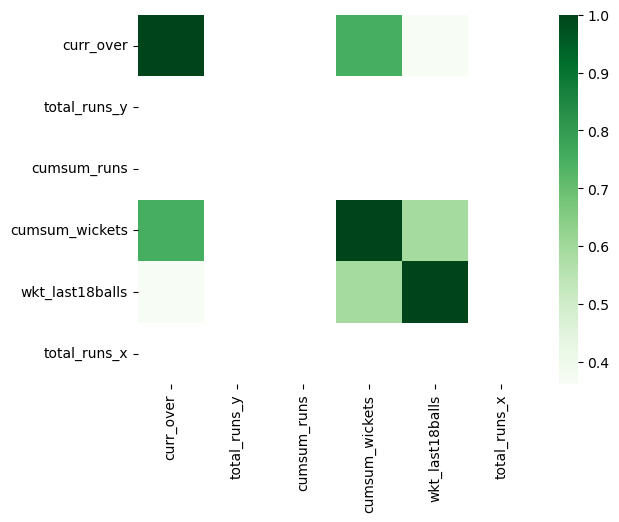

In [98]:
sns.heatmap(abs(new_ipl.corr()), cmap='Greens')

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
scaler = StandardScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

ValueError: could not convert string to float: "['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'MK Tiwary', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir']['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'MK Tiwary', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir']['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'MK Tiwary', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir']['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'MK Tiwary', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir']['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'MK Tiwary', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir']['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'MK Tiwary', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir']['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'MK Tiwary', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir']['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'MK Tiwary', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir']['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'MK Tiwary', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir']['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'MK Tiwary', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir']['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'MK Tiwary', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir']['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'MK Tiwary', 'R Bhatia', 'DL Chahar', 'A Zampa', 'AB Dinda', 'Imran Tahir']"

In [101]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))


[[20 85]
 [19 66]]
              precision    recall  f1-score   support

           0       0.51      0.19      0.28       105
           1       0.44      0.78      0.56        85

    accuracy                           0.45       190
   macro avg       0.47      0.48      0.42       190
weighted avg       0.48      0.45      0.40       190

Accuracy of SVM classifier on test set: 0.4526


In [102]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

[[54 51]
 [48 37]]
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       105
           1       0.42      0.44      0.43        85

    accuracy                           0.48       190
   macro avg       0.47      0.47      0.47       190
weighted avg       0.48      0.48      0.48       190

Accuracy of decision tree classifier on test set: 0.4789


In [103]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

[[34 71]
 [27 58]]
              precision    recall  f1-score   support

           0       0.56      0.32      0.41       105
           1       0.45      0.68      0.54        85

    accuracy                           0.48       190
   macro avg       0.50      0.50      0.48       190
weighted avg       0.51      0.48      0.47       190

Accuracy of logistic regression classifier on test set: 0.4842
